In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Input, concatenate
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
# train data 
# t_data = 2*x1 -3*x2 + 2*x3

xdata = np.array([[1,2,0],[5,4,3],[1,2,-1],
                  [3,1,0],[2,4,2],[4,1,2],
                  [-1,3,2],[4,3,3],[0,2,6],
                  [2,2,1],[1,-2,-2],[0,1,3],
                  [1,1,3],[0,1,4],[2,3,3]])

tdata = np.array([-4,4,-6,3,-4,9,-7,5,6,0,4,3,5,5,1])

print(f'xdata.shape = {xdata.shape}, tdata.shape = {tdata.shape}')

xdata.shape = (15, 3), tdata.shape = (15,)


Sequential API

In [3]:
model = Sequential()

model.add(Dense(1,input_shape=(3,),activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer=SGD(),loss='mse')

In [5]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(xdata, tdata, epochs=500)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/500
1/1 [==============================] - 1s 667ms/step - loss: 35.5433
Epoch 2/500
1/1 [==============================] - 0s 20ms/step - loss: 32.5678
Epoch 3/500
1/1 [==============================] - 0s 15ms/step - loss: 30.3669
Epoch 4/500
1/1 [==============================] - 0s 25ms/step - loss: 28.5858
Epoch 5/500
1/1 [==============================] - 0s 23ms/step - loss: 27.0472
Epoch 6/500
1/1 [==============================] - 0s 23ms/step - loss: 25.6617
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 24.3832
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 23.1872
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 22.0601
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 20.9937
Epoch 11/500
1/1 [==============================] - 0s 22ms/step - loss: 19.9823
Epoch 12/500
1/1 [==============================] - 0s 18ms/step - loss: 19.0219
Epoch 13/500
1/1 [====================

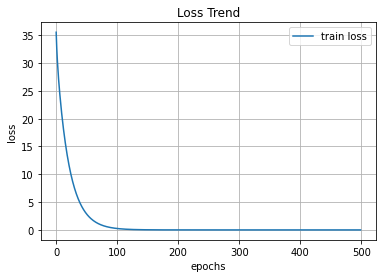

In [6]:
# 손실함수 출력
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.legend(loc='best')

plt.show()

In [7]:
test_data = np.array([[5,5,0],[2,3,1],[-1,0,-1],[10,5,2],[4,-1,-2]])
ret_val = [ 2*data[0] -3*data[1] + 2*data[2]  for data in test_data ]

predict_val = model.predict(test_data)

In [8]:
print(f'predict_val type : {type(predict_val)}')
print(f'predict_val shape : {predict_val.shape}')
print(predict_val)
print('============')
print(ret_val)

predict_val type : <class 'numpy.ndarray'>
predict_val shape : (5, 1)
[[-5.000996 ]
 [-2.999664 ]
 [-3.997358 ]
 [ 8.996936 ]
 [ 7.0015473]]
[-5, -3, -4, 9, 7]


In [9]:
print(model.input)
print(model.output)
print(model.weights[0]) # W
print(model.weights[1]) # b

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name='dense_input'), name='dense_input', description="created by layer 'dense_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")
<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.9996768],
       [-3.0002947],
       [ 1.999774 ]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.00209271], dtype=float32)>


Functional API

In [10]:
input_ = Input(shape=(3,))
output_ = Dense(1, activation='linear')(input_)

model = Model(inputs=input_, outputs=output_)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer=SGD(), loss='mse')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [12]:
hist = model.fit(xdata, tdata, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 696ms/step - loss: 40.2426
Epoch 2/500
1/1 [==============================] - 0s 14ms/step - loss: 30.9253
Epoch 3/500
1/1 [==============================] - 0s 22ms/step - loss: 25.6054
Epoch 4/500
1/1 [==============================] - 0s 13ms/step - loss: 22.3188
Epoch 5/500
1/1 [==============================] - 0s 17ms/step - loss: 20.0899
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 18.4316
Epoch 7/500
1/1 [==============================] - 0s 16ms/step - loss: 17.0985
Epoch 8/500
1/1 [==============================] - 0s 27ms/step - loss: 15.9652
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 14.9659
Epoch 10/500
1/1 [==============================] - 0s 12ms/step - loss: 14.0647
Epoch 11/500
1/1 [==============================] - 0s 16ms/step - loss: 13.2409
Epoch 12/500
1/1 [==============================] - 0s 22ms/step - loss: 12.4817
Epoch 13/500
1/1 [==================

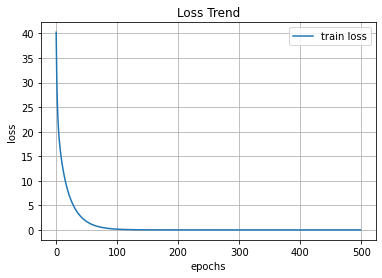

In [13]:
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.legend()

plt.show()

In [14]:
test_data = np.array([[5,5,0],[2,3,1],[-1,0,-1],[10,5,2],[4,-1,-2]])
ret_val = [ 2*data[0] -3*data[1] + 2*data[2]  for data in test_data ]

predict_val = model.predict(test_data)

print(f'predict_val type : {type(predict_val)}')
print(f'predict_val shape : {predict_val.shape}')
print(predict_val)
print('============')
print(ret_val)

predict_val type : <class 'numpy.ndarray'>
predict_val shape : (5, 1)
[[-5.0026064]
 [-2.9992156]
 [-3.993398 ]
 [ 8.992344 ]
 [ 7.0039797]]
[-5, -3, -4, 9, 7]
